# Successive halving
---------------------------------

This example shows how to compare multiple tree-based models using successive halving.

Import the california housing dataset from [sklearn.datasets](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html).
 This is a small and easy to train dataset whose goal is to predict house prices.

## Load the data

In [9]:
from sklearn.datasets import fetch_california_housing
from atom import ATOMRegressor

In [10]:
# Load the data
X, y = fetch_california_housing(return_X_y=True)

## Run the pipeline

In [11]:
atom = ATOMRegressor(X, y, verbose=2, random_state=1)

<< ================== ATOM ================== >>
Algorithm task: regression.

Dataset stats ==================== >>
Shape: (20640, 9)
Scaled: False
Outlier values: 811 (0.5%)
-------------------------------------
Train set size: 16512
Test set size: 4128



In [12]:
# Compare tree-based models via successive halving
atom.successive_halving(
    models=["Tree", "Bag", "ET", "RF", "LGB", "CatB"],
    metric="mae",
    n_bootstrap=5,
)



Run: 0 ================================ >>
Models: Tree6, Bag6, ET6, RF6, LGB6, CatB6
Size of training set: 16512 (17%)
Size of test set: 4128

Training ========================= >>
Metric: neg_mean_absolute_error


Results for Decision Tree:
Fit ---------------------------------------------
Train evaluation --> neg_mean_absolute_error: -0.0
Test evaluation --> neg_mean_absolute_error: -0.564
Time elapsed: 0.031s
Bootstrap ---------------------------------------
Evaluation --> neg_mean_absolute_error: -0.5626 ± 0.0194
Time elapsed: 0.266s
-------------------------------------------------
Total time: 0.297s


Results for Bagging:
Fit ---------------------------------------------
Train evaluation --> neg_mean_absolute_error: -0.1716
Test evaluation --> neg_mean_absolute_error: -0.4253
Time elapsed: 0.141s
Bootstrap ---------------------------------------
Evaluation --> neg_mean_absolute_error: -0.4284 ± 0.0042
Time elapsed: 1.016s
-------------------------------------------------
Total

## Analyze results

In [13]:
# The results is now multi-index, where frac is the fraction
# of the training set used to fit the model. The model names
# end with the number of models fitted during that run
atom.results

metric_train  metric_test time_fit  mean_bootstrap  std_bootstrap  \
frac model                                                                      
0.17 Bag6  -1.716132e-01    -0.425329   0.141s       -0.428422       0.004202   
     CatB6 -2.316594e-01    -0.291079   4.033s       -0.343854       0.001604   
     ET6   -2.500448e-15    -0.352708   0.810s       -0.392057       0.001472   
     LGB6  -2.350471e-01    -0.325999   0.297s       -0.360198       0.003051   
     RF6   -1.491169e-01    -0.399763   1.377s       -0.407387       0.003003   
     Tree6 -3.743775e-17    -0.563991   0.031s       -0.562617       0.019377   
0.33 CatB3 -2.316594e-01    -0.291079   3.538s       -0.323212       0.000260   
     ET3   -2.500448e-15    -0.352708   1.129s       -0.367404       0.001401   
     LGB3  -2.350471e-01    -0.325999   0.195s       -0.335340       0.001817   
1.00 CatB1 -2.316594e-01    -0.291079   5.688s       -0.298891       0.001028   

           time_bootstrap     time  
frac model                          
0.17 Bag6          1.016s   1.156s  
     CatB6        17.500s  21.533s  
     ET6           3.329s   4.138s  
     LGB6          0.926s   1.223s  
     RF6           6.079s   7.456s  
     Tree6         0.266s   0.297s  
0.33 CatB3        18.490s  22.027s  
     ET3           4.874s   6.010s  
     LGB3          0.852s   1.048s  
1.00 CatB1        26.767s  32.456s

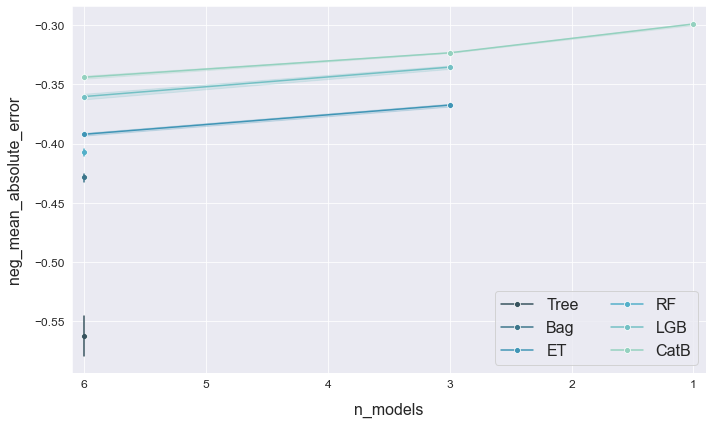

In [14]:
# Plot the successive halving's results
atom.plot_successive_halving()

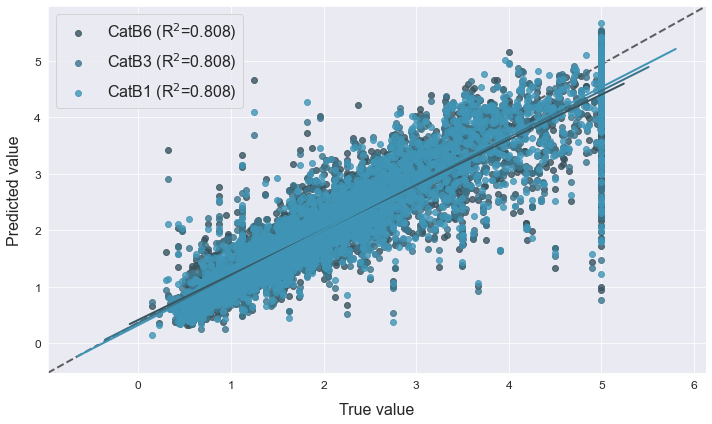

In [15]:
# Use an acronym to call all the models with the same estimator
atom.plot_errors(models=["CatB"])

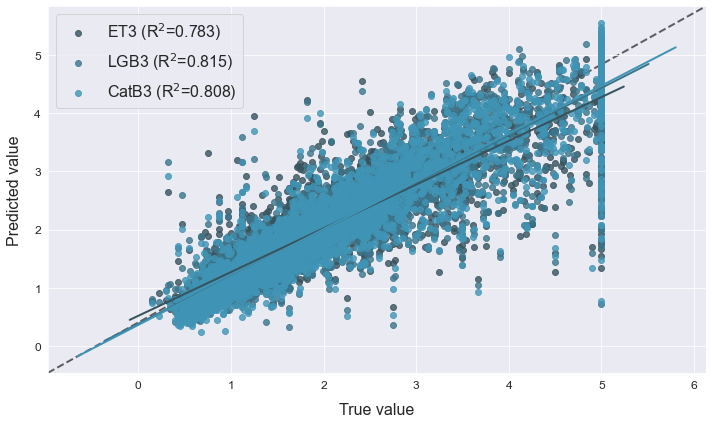

In [16]:
# Use the number to call the models from the same run
atom.plot_errors(models="3")